In [2]:
import warnings

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn

import logging

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# print("TensorFlow v" + tf.__version__)
#print("TensorFlow Decision Forests v" + tfdf.__version__)

In [3]:
dataset_df = pd.read_csv('data-splitted/train_dataset.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (431, 58)


In [4]:
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,9ef1886b810c,0.252107,6382.61448,410.629350,6.073217,17.952834,4.996476,0.038671,14.689962,9.572136,...,7.020590,2.00158,0.629889,26.706042,72.611063,8776.686879,19.125940,145.114812,0.171564,1
1,ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,...,38.083826,1.35662,0.067730,15.766890,118.826134,384.850764,16.435657,14.158860,0.069015,1
2,0f9257f237b4,0.162374,3245.45474,85.200147,14.469184,8.138688,4.208025,0.038671,8.009842,1.229900,...,6.169800,0.88885,0.331877,17.915652,1228.992706,4256.400636,15.803087,105.475148,7.128000,0
3,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
4,fbd12c4ae88b,0.581128,4268.30888,85.200147,43.212441,11.835708,6.343044,0.025578,7.045636,11.188576,...,0.173229,1.20640,0.196417,17.255210,72.611063,38475.318010,27.766102,133.988340,21.978000,0


In [5]:
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,431.000000,431.00000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,430.000000,431.000000,429.000000,431.000000,431.000000,431.000000,431.000000,431.000000,430.000000,431.000000
mean,0.476117,3476.37516,117.347844,36.493291,9.738576,5.584510,0.042854,10.591249,9.142564,5333.301827,...,5.625919,4.494561,0.440734,20.723140,122.730342,15442.979644,31.845069,48.652089,8.566133,0.162413
std,0.503392,2446.89510,117.710487,59.377952,9.210571,2.676082,0.052045,4.475822,77.206921,2921.550829,...,12.899069,60.021787,1.541592,10.072465,119.919765,20788.437041,9.742185,34.719641,10.329934,0.369258
min,0.081187,192.59328,85.200147,4.617627,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2163.96158,85.200147,12.036490,8.138688,4.181448,0.025578,8.139033,1.229900,4153.050190,...,0.173229,0.497060,0.067730,14.501818,72.611063,2794.719186,25.239543,21.591297,0.135034,0.000000
50%,0.350386,3070.40404,85.200147,20.762288,8.138688,5.023053,0.025578,10.442414,1.229900,5066.115430,...,3.024156,1.131000,0.257374,18.669114,72.611063,7863.793713,31.234074,39.927728,0.339429,0.000000
75%,0.540535,4258.15819,115.851472,37.620807,8.138688,6.387339,0.034256,12.988422,5.000422,6043.542118,...,6.115727,1.509740,0.521521,25.408413,125.295935,21548.650970,37.317909,65.893354,21.978000,0.000000
max,6.161666,28688.18766,1817.620554,630.518230,178.943634,38.270880,0.624529,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1228.992706,143790.071200,69.154785,191.194764,21.978000,1.000000


<Axes: ylabel='count'>

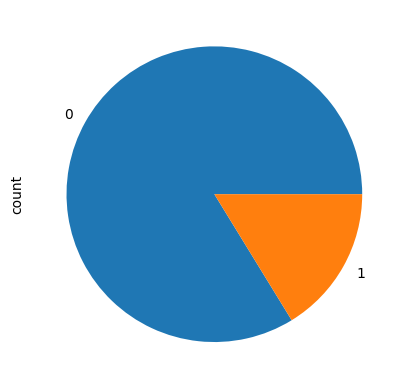

In [6]:
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="pie")

In [7]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["Id", "EJ", "Class"]]

<Axes: xlabel='EJ', ylabel='count'>

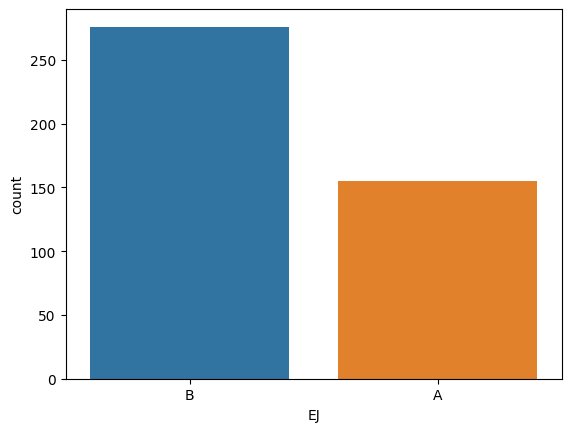

In [8]:
sns.countplot(x='EJ', data=dataset_df)

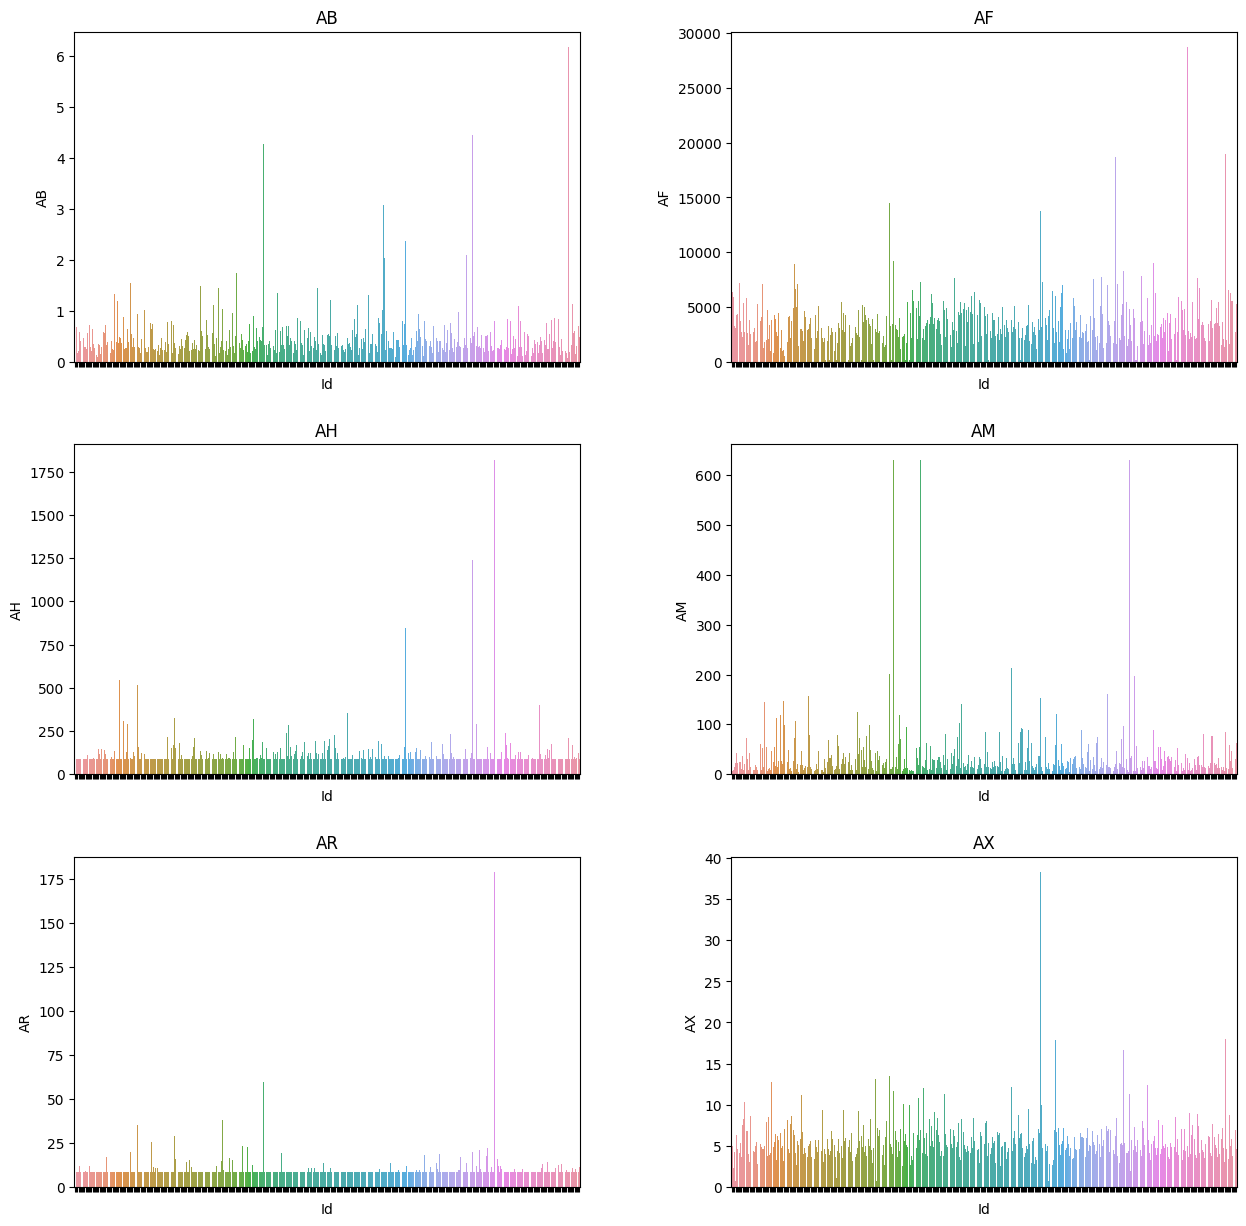

In [9]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df['Id'], y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

In [16]:
len(NUM_FEATURE_COLUMNS)

55

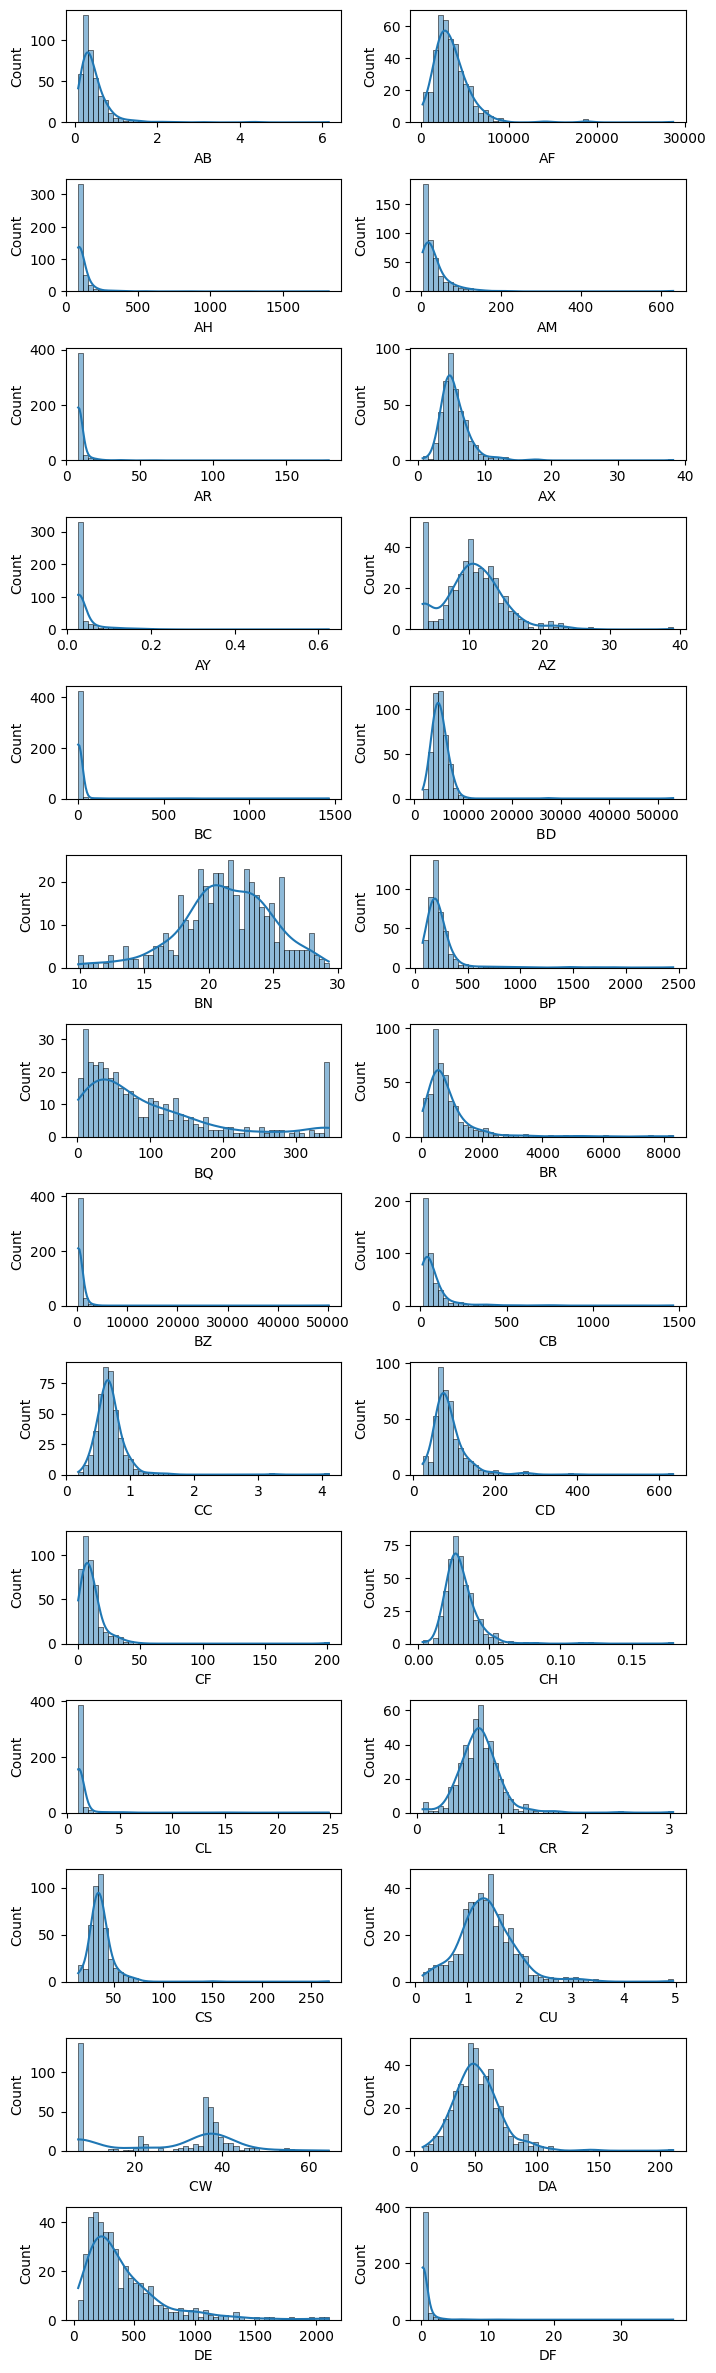

In [30]:
plt.figure(figsize=(8,30))
for index, feature in enumerate(NUM_FEATURE_COLUMNS[:28]):
    plt.subplot(14,2,index+1)
    sns.histplot(dataset_df[feature],bins=50,kde=True)
    #plt.title(feature)
plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.show()

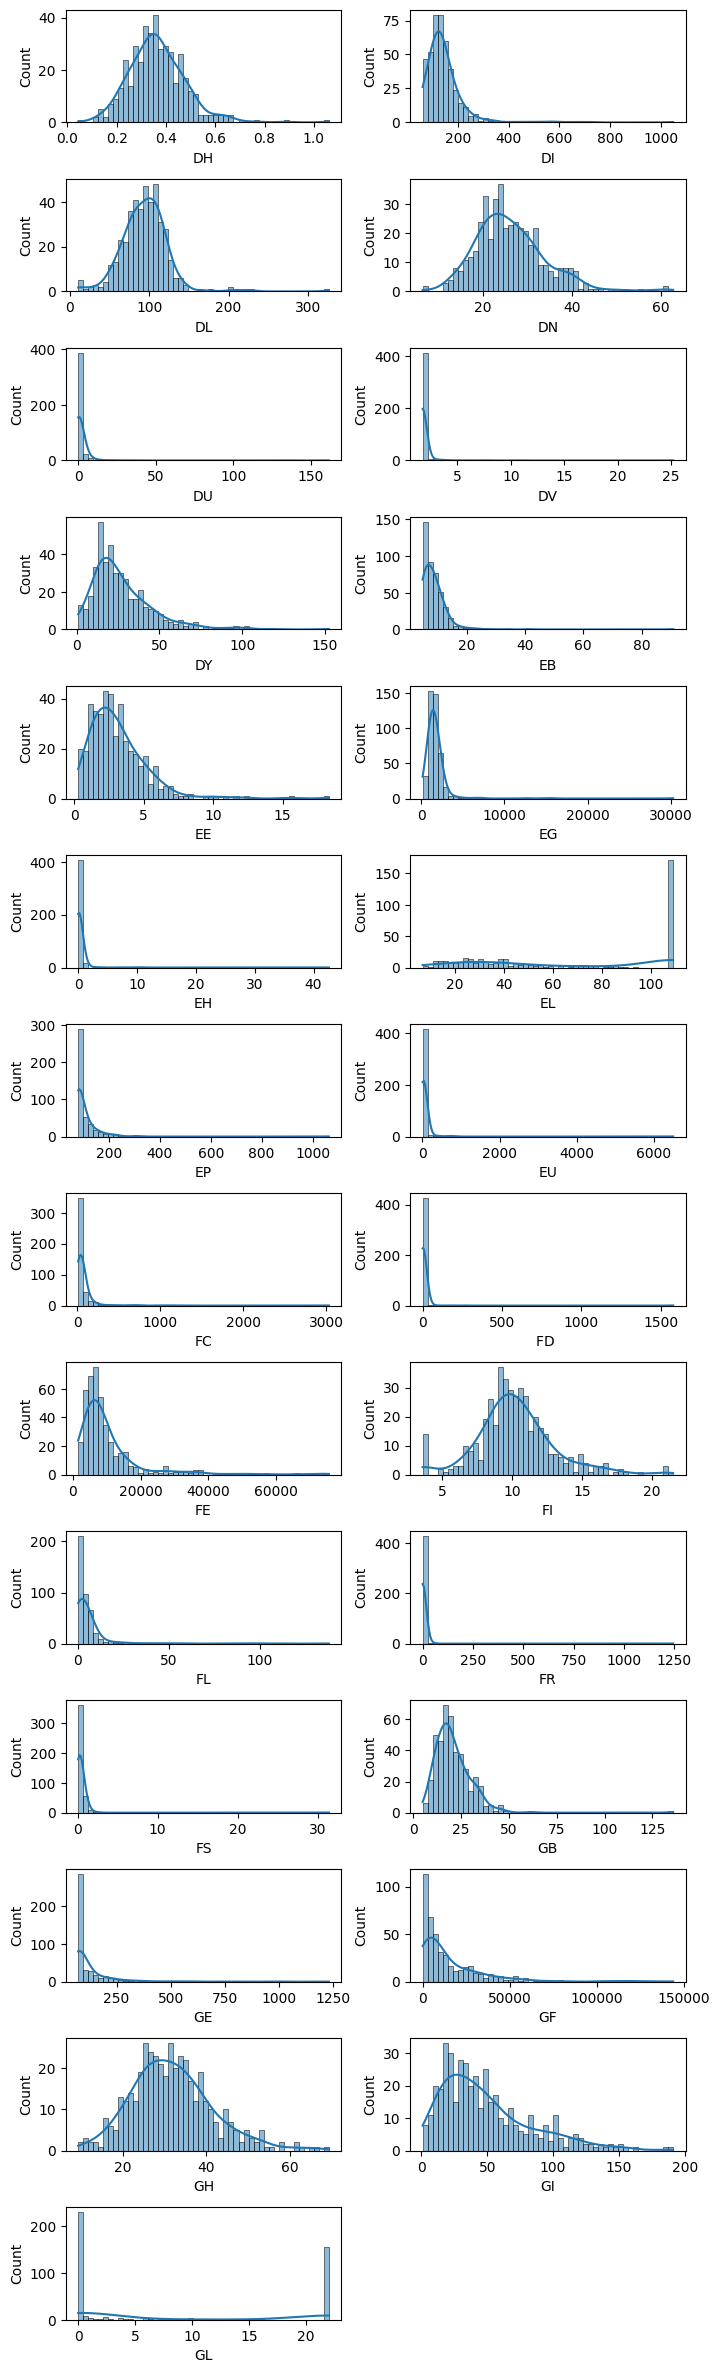

In [31]:
plt.figure(figsize=(8,30))
for index, feature in enumerate(NUM_FEATURE_COLUMNS[28:]):
    plt.subplot(14,2,index+1)
    sns.histplot(dataset_df[feature],bins=50,kde=True)
    #plt.title(feature)
plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

<Axes: xlabel='BQ', ylabel='Count'>

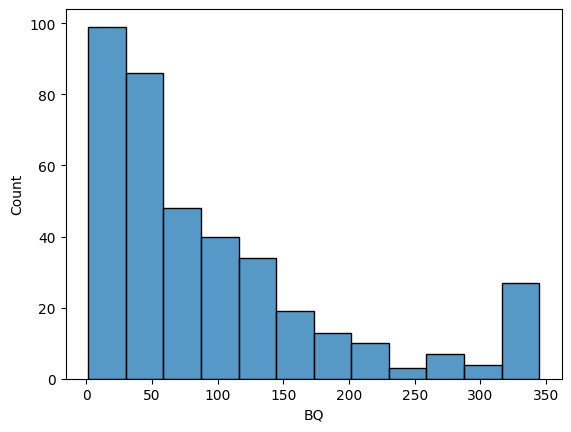

In [13]:
sns.histplot(x='BQ', data = dataset_df)

<Axes: xlabel='EL', ylabel='Count'>

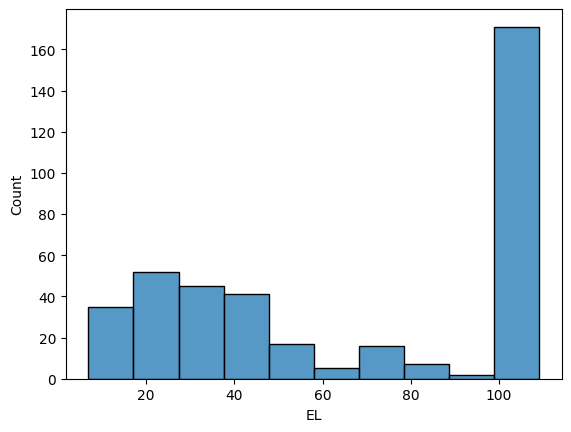

In [14]:
sns.histplot(x='EL', data = dataset_df)

In [38]:
dataset_df['BQ'] = dataset_df['BQ'].fillna(dataset_df['BQ'].mean())
dataset_df['EL'] = dataset_df['EL'].fillna(dataset_df['EL'].mode())
dataset_df = dataset_df.fillna(0)
dataset_df['EJ'] = dataset_df['EJ'].apply(lambda x: 0 if x=='A' else 1)

In [57]:
X = dataset_df.drop(['Id','Class'], axis =1)
y= dataset_df['Class']

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled,y)

In [59]:
test_data = pd.read_csv("data-splitted/validate_dataset.csv")

In [60]:
test_data['BQ'] = test_data['BQ'].fillna(dataset_df['BQ'].mean())
test_data['EL'] = test_data['EL'].fillna(dataset_df['EL'].mode())
test_data = test_data.fillna(0)
test_data['EJ'] = test_data['EJ'].apply(lambda x: 0 if x=='A' else 1)

In [61]:
X_test= test_data.drop(['Id','Class'], axis=1)
y_test = test_data['Class']
X_test = scaler.transform(X_test)

In [62]:
X_train = X_resampled
y_train = y_resampled

In [63]:
import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from sklearn.model_selection import ParameterGrid
import logging

In [64]:
def get_experiment_id(experiment_name):
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment:
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [65]:
def train_models(X_train, X_test, y_train, y_test):
    mlflow.set_tracking_uri("sqlite:///mlflow.db")
    experiment_id = get_experiment_id("age_identify_exp_v3")

    models = [
        {"name": "RandomForest",
         "model": RandomForestClassifier(),
         "parameters": {"n_estimators": [10, 50, 100], "max_depth": [None, 5, 10]}},
        {"name": "XGBoost",
         "model": XGBClassifier(),
         "parameters": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 1.0]}},
    ]
    for model_info in models:
        model_name = model_info["name"]
        model = model_info["model"]
        param_grid = model_info["parameters"]

        for parameters in ParameterGrid(param_grid):
            model.set_params(**parameters)
            with mlflow.start_run(experiment_id=experiment_id):
                model.fit(X_train, y_train)

                predicted_classes = model.predict(X_test)

                accuracy = accuracy_score(y_test, predicted_classes)
                precision = precision_score(y_test, predicted_classes)
                recall = recall_score(y_test, predicted_classes)
                f1 = f1_score(y_test, predicted_classes)

                print(f"{model_name} model (parameters={parameters}):")
                print("  Accuracy: %s" % accuracy)
                print("  Precision: %s" % precision)
                print("  Recall: %s" % recall)
                print("  F1 Score: %s" % f1)

                mlflow.log_param("model_name", model_name)
                mlflow.log_params(parameters)
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)
                mlflow.log_metric("f1", f1)

                predictions = model.predict(X_train)
                signature = infer_signature(X_train, predictions)

                mlflow.sklearn.log_model(model, f"{model_name}_model", signature=signature)
    

In [66]:
import warnings
warnings.filterwarnings("ignore")
train_models(X_train, X_test, y_train, y_test)

RandomForest model (parameters={'max_depth': None, 'n_estimators': 10}):
  Accuracy: 0.8924731182795699
  Precision: 0.7647058823529411
  Recall: 0.6842105263157895
  F1 Score: 0.7222222222222222
RandomForest model (parameters={'max_depth': None, 'n_estimators': 50}):
  Accuracy: 0.9516129032258065
  Precision: 0.8717948717948718
  Recall: 0.8947368421052632
  F1 Score: 0.8831168831168831
RandomForest model (parameters={'max_depth': None, 'n_estimators': 100}):
  Accuracy: 0.956989247311828
  Precision: 0.875
  Recall: 0.9210526315789473
  F1 Score: 0.8974358974358975
RandomForest model (parameters={'max_depth': 5, 'n_estimators': 10}):
  Accuracy: 0.8978494623655914
  Precision: 0.7021276595744681
  Recall: 0.868421052631579
  F1 Score: 0.7764705882352942
RandomForest model (parameters={'max_depth': 5, 'n_estimators': 50}):
  Accuracy: 0.946236559139785
  Precision: 0.8333333333333334
  Recall: 0.9210526315789473
  F1 Score: 0.875
RandomForest model (parameters={'max_depth': 5, 'n_est

In [68]:
experiment_id = get_experiment_id("age_identify_exp_v3")
runs = mlflow.search_runs(experiment_ids=[experiment_id])

# Sort by one of the metrics and get the top run
best_run = runs.sort_values("metrics.f1", ascending=False).iloc[0]

params = best_run.loc[[name.startswith("params.") for name in best_run.index]]
metrics = best_run.loc[[name.startswith("metrics.") for name in best_run.index]]

print(params, metrics)

params.model_name       RandomForest
params.learning_rate            None
params.n_estimators              100
params.max_depth                  10
Name: 9, dtype: object metrics.f1           0.906667
metrics.precision    0.918919
metrics.accuracy     0.962366
metrics.recall       0.894737
Name: 9, dtype: object


In [69]:
# Sort by one of the metrics and get the top run
best_run = runs.sort_values("metrics.f1", ascending=False).iloc[0]

# Extract the run_id and artifact_uri for the best run
run_id = best_run.run_id
artifact_uri = f"runs:/{run_id}/model"  # The 'model' is the artifact name where the model is saved
print("path", artifact_uri)

path runs:/a92a77eb5dbd41cca9ea40aa4663935d/model


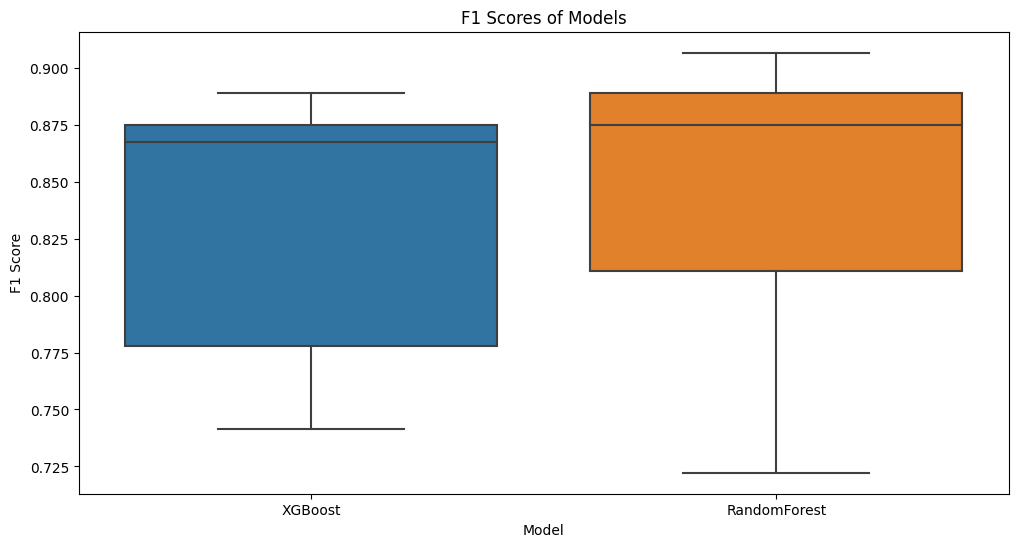

In [70]:
# Create a boxplot for F1 scores of each model
plt.figure(figsize=(12, 6))
sns.boxplot(data=runs, x='params.model_name', y='metrics.f1')
plt.title('F1 Scores of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

In [76]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [77]:
test_df = pd.read_csv("data/test.csv")
test_df['BQ'] = test_df['BQ'].fillna(dataset_df['BQ'].mean())
test_df['EL'] = test_df['EL'].fillna(dataset_df['EL'].mode())
test_df = test_df.fillna(0)
test_df['EJ'] = test_df['EJ'].apply(lambda x: 0 if x=='A' else 1)

In [78]:
prediction = rf.predict(test_df.drop('Id', axis=1))

In [79]:
test_ids = test_df['Id']
predictions = rf.predict_proba(test_df.drop('Id', axis=1))
predictions_with_id = np.column_stack((test_ids, predictions))

# Convert the numpy array to a DataFrame (optional)
columns = ['Id'] + [f'class_{i}' for i in range(predictions.shape[1])]
predictions_df = pd.DataFrame(predictions_with_id, columns=columns)


In [80]:
predictions_df

,Id,class_0,class_1
0,00eed32682bb,0.411823,0.588177
1,010ebe33f668,0.411823,0.588177
2,02fa521e1838,0.411823,0.588177
3,040e15f562a2,0.411823,0.588177
4,046e85c7cc7f,0.411823,0.588177
